<a href="https://colab.research.google.com/github/esowunmi2016/Foundations-Of-AI/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You will need to upload the dredit data as df to run the code and its a top down apporach from there

In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:
import io
import pandas as pd
import numpy as np

df = pd.read_csv(io.BytesIO(uploaded['Credit_N400_p9.csv']))
# print(df)

In [ ]:
# RANDOMLY INITIATED PARAMETER VECTOR (slope vector) 
import random

slopeV = []

for x in range(9):
  slopeV.append(random.random())  

slopeV = np.array(slopeV)
# print(slopeV)

In [ ]:
def dmat_prep(dmat):
  dmat = dmat.drop('Balance', axis=1)
  dmat['Gender'] = dmat['Gender'].transform(lambda x: 1 if x == 'Male' else 0)
  dmat['Student'] = dmat['Student'].transform(lambda x: 1 if x == 'Yes' else 0)
  dmat['Married'] = dmat['Married'].transform(lambda x: 1 if x == 'Yes' else 0)

  # Center and standardise 
  for x in ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']:
    dmat[x] = dmat[x].transform(lambda x: (x-x.mean())/x.std())

  # print(dmat)
  return(dmat.to_numpy())

# dmat = prep_dmat(df)

In [ ]:
# Response Vector (Centered)
def rvec_prep(df):
  rvec = df['Balance'].transform(lambda x: x - x.mean()).to_numpy()
  return(rvec)


In [ ]:
def beta_hat(x, y):
  # 𝛽 ≔ 𝛽 − 2𝛼[𝜆𝛽 − 𝐗𝑇(𝐲 − 𝐗𝛽)]

  # l = 10000
  a = 0.00001
  B = slopeV
  # x = dmat_prep(df)
  # y = rvec_prep(df)

  lam = [.01, .1, 1, 10, 100, 1000, 10000]
  Blist = []

  # Formular translation
  # B = B - 2*a * (l*B - np.transpose(x) @ (y - x@B))

  for l in lam:
    for i in range(100000):
      B = B - 2*a * (l*B - np.transpose(x) @ (y - x@B))
    Blist.append(B)

  # print(Blist)
  print(np.shape(x))
  print(np.shape(B))
  return(Blist)

Blist = beta_hat(dmat_prep(df), rvec_prep(df))

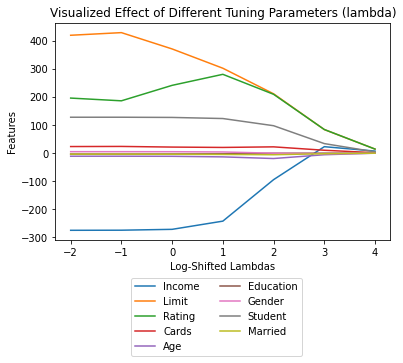

In [ ]:
# Deliverable 1
import matplotlib.pyplot as plt

lam = [.01, .1, 1, 10, 100, 1000, 10000]

plt.plot(np.log10(lam), Blist)
plt.title("Visualized Effect of Different Tuning Parameters (lambda)")
plt.xlabel("Log-Shifted Lambdas")
plt.ylabel("Features")
plt.legend(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married'], loc ="upper right", bbox_to_anchor =(0.75, -0.15), ncol = 2)
plt.show()


In [ ]:
def beta_hat2(x, y, l):
  # 𝛽 ≔ 𝛽 − 2𝛼[𝜆𝛽 − 𝐗𝑇(𝐲 − 𝐗𝛽)]
  # Formular translation
  # B = B - 2*a * (l*B - np.transpose(x) @ (y - x@B))

  a = 0.00001
  B = slopeV

  for i in range(100000):
    B = B - 2*a * (l*B - np.transpose(x) @ (y - x@B))

  return(B)

In [ ]:
def fold_prep(fit, test):
  dmat_test = test.drop('Balance', axis=1)
  dmat_test['Gender'] = dmat_test['Gender'].transform(lambda x: 1 if x == 'Male' else 0)
  dmat_test['Student'] = dmat_test['Student'].transform(lambda x: 1 if x == 'Yes' else 0)
  dmat_test['Married'] = dmat_test['Married'].transform(lambda x: 1 if x == 'Yes' else 0)
 
  dmat_fit = fit.drop('Balance', axis=1)
  dmat_fit['Gender'] = dmat_fit['Gender'].transform(lambda x: 1 if x == 'Male' else 0)
  dmat_fit['Student'] = dmat_fit['Student'].transform(lambda x: 1 if x == 'Yes' else 0)
  dmat_fit['Married'] = dmat_fit['Married'].transform(lambda x: 1 if x == 'Yes' else 0)

  # Center and standardise 
  for g in ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']:
    dmat_fit[g] = dmat_fit[g].transform(lambda x: (x-(x.mean()))/x.std())
    dmat_test[g] = dmat_test[g].transform(lambda x: (x-x.mean())/x.std())

  dmat_fit = dmat_fit.to_numpy()
  dmat_test = dmat_test.to_numpy()
  rvec_fit = fit['Balance'].transform(lambda x: x - x.mean()).to_numpy()
  rvec_test = test['Balance'].transform(lambda x: x - fit['Balance'].mean()).to_numpy()
  # print(dmat)
  # return(test.to_numpy())
  return([dmat_fit, rvec_fit, dmat_test, rvec_test])


In [ ]:
df1 = df.sample(frac = 1)

f1 = fold_prep(df1.iloc[80:400], df1.iloc[:80])
f2 = fold_prep(pd.concat([df1.iloc[:80], df1.iloc[160:400]]), df1.iloc[80:160])
f3 = fold_prep(pd.concat([df1.iloc[:160], df1.iloc[240:400]]), df1.iloc[160:240])
f4 = fold_prep(pd.concat([df1.iloc[:240], df1.iloc[320:400]]), df1.iloc[240:320])
f5 = fold_prep(df1.iloc[:320], df1.iloc[320:400])

In [ ]:

flist = [f1, f2, f3, f4, f5]
# h = f1[2]@b
# MSE = np.square(np.subtract(f1[3], f1[2]@b)).mean()

# lam = [.01, .1, 1, 10, 100, 1000, 10000]

CVlist = []
for y in lam:
  g = 0
  for x in flist:
    b = beta_hat2(x[0], x[1], y)
    MSE = np.square(np.subtract(x[3], x[2]@b)).mean()
    g += MSE
  CV = g/5
  CVlist.append(CV)

# print(CVlist)

15825.429976603831
15825.429976603831
[15068.869769517562, 15067.110190098832, 15069.335615694872, 15695.529529551926, 34177.70583613714, 108514.72437034885, 191005.48616478595]


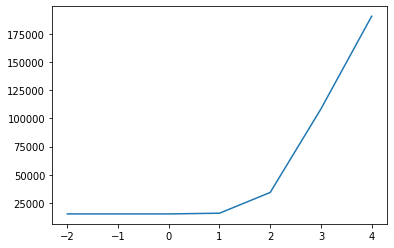

In [ ]:
# Deliverable 2
import matplotlib.pyplot as plt

# lam = [.01, .1, 1, 10, 100, 1000, 10000]


plt.plot(np.log10(lam), CVlist)
# plt.title("Visualized Effect of Different Tuning Parameters (lambda) With Cross-Validation")
# plt.xlabel("Log-Shifted Lambdas")
# plt.ylabel("Cross-Validation Error")
plt.show()

DELIVERABLE 3

From the graph in deliverable 2, we can see that lambda = 0.01 had the lowest CV Error

In [ ]:
# DELIVERABLE 4
# the slope vector for the model using the the optimal lambda
print(Blist[0])

[-274.99750054  420.06781116  196.19636325   23.4731164   -10.97882905
   -3.35094957    5.20749056  127.94296153   -3.60029068]


DELIVERABLE 4

We can get the equation of the model trained with the optimal lambda value to be: 

y = Bx
where:
x = design matrix

B = [-274.99760896  420.01984149  196.24450722   23.47104183  -10.97888191
   -3.35069967    5.20749426  127.94267304   -3.60062073]

y = prediction


In [ ]:
# EXTRA CREDIT
# importing the ML packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from numpy import mean
from numpy import absolute
from numpy import sqrt
from numpy import arange




X = dmat_prep(df)
y = rvec_prep(df)


In [ ]:
Blist2 = []
i = 0
lam = [.01, .1, 1, 10, 100, 1000, 10000]

for x in lam:
  model = Ridge(alpha=x)
  model.fit(X, y)
  Blist2.append(model.coef_)
  i += 1
# print(Blist2)

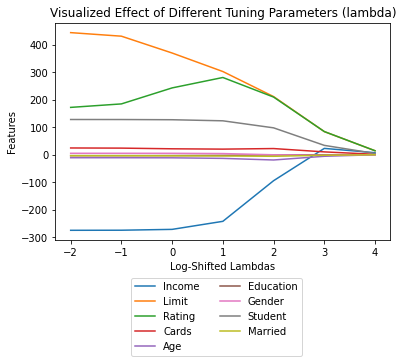

In [ ]:
# DELIVERABLE 1 WITH MACHINE LEARNING MODUE (sklearn)

import matplotlib.pyplot as plt

lam = [.01, .1, 1, 10, 100, 1000, 10000]

plt.plot(np.log10(lam), Blist2)
plt.title("Visualized Effect of Different Tuning Parameters (lambda)")
plt.xlabel("Log-Shifted Lambdas")
plt.ylabel("Features")
plt.legend(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married'], loc ="upper right", bbox_to_anchor =(0.75, -0.15), ncol = 2)
plt.show()

In [ ]:
# Extra Credit assignment 2 & 3

# MSE = mean_squared_error(f1[3], f1[2]@b)


In [ ]:
# Extra Credit Deliverable 4 


#define cross-validation method to use
cv = KFold(n_splits=5)

#define model
model = RidgeCV(alphas=lam, cv=None, scoring='neg_mean_absolute_error', fit_intercept=False, store_cv_values=True)

#fit model
model.fit(X, y)

#display lambda that produced the lowest test MSE
print(model.alpha_)

# print(model.coef_)

# np.shape(model.cv_values_)
# model.cv_values_

0.01
